True

In [41]:
import os;
import pickle; 
if os.path.isfile('/Users/enochyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/All_Standard_Curves_A549.pickle'):
    StandardCurve_File = open('/Users/enochyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/All_Standard_Curves_A549.pickle','rb');
    All_Dicts = pickle.load(StandardCurve_File);
    Num_to_Curve_Dict = All_Dicts[0];
    Num_to_Name_Dict = All_Dicts[1]; 
#Num_to_Curve_Dict[0][1] =Num_to_Curve_Dict[0][1]*0.0; 
#Num_to_Curve_Dict[0][0] =Num_to_Curve_Dict[0][1]*0.0+1.0; 


In [42]:
X = list(Num_to_Name_Dict.keys())
X.sort();
print(X)
Num_to_Name_Dict[0]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


'Negative Control'

## Identify the "Most Colonizing" Strain by Bacterial Patching

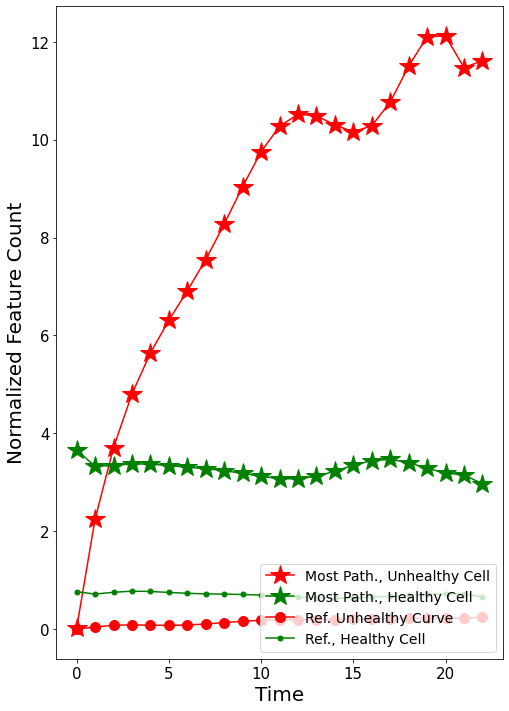

In [43]:
import numpy as np;
import matplotlib.pyplot as plt;
filter_traces = 1;

All_Strain_Nums = list(Num_to_Curve_Dict.keys())
All_Strain_Nums.sort();
Most_Pathogenic_Strain = 0;  # An arbitrary choice to start with, we will optimize over all possible strains. 
Initial_Pathogenic_Strain = Most_Pathogenic_Strain; 
Discriminant_Kernel_Index = 1; # This is assuming we will classify based on the pathogenicity curve of 0 - healthy cell count, 1- unhealthy cell count, or 2- "bacterial patching"
for Strain_Index in All_Strain_Nums:
    if np.sum(Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index]\
              -Num_to_Curve_Dict[Strain_Index][Discriminant_Kernel_Index])<0:
        Most_Pathogenic_Strain = Strain_Index; 

t = np.arange(0,len(Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index]*.5),1)



from scipy.signal import savgol_filter

plt.figure(figsize=(8,12))

if filter_traces:
    This_Y = savgol_filter(Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index], len(t), 9)
    plt.plot(t,This_Y,'r*-',markersize=20)
    This_Y = savgol_filter(Num_to_Curve_Dict[Most_Pathogenic_Strain][0], len(t), 9)
    plt.plot(t,This_Y,'g*-',markersize=20)

    This_Y = savgol_filter(Num_to_Curve_Dict[Initial_Pathogenic_Strain][Discriminant_Kernel_Index], len(t), 9)
    plt.plot(t,This_Y,'ro-',markersize=10)
    This_Y = savgol_filter(Num_to_Curve_Dict[Initial_Pathogenic_Strain][0], len(t), 9)
    plt.plot(t,This_Y,'g.-',markersize=10)
else: 
    This_Y = Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index]
    plt.plot(t,This_Y,'ro-',markersize=10)
    This_Y = Num_to_Curve_Dict[Most_Pathogenic_Strain][0]
    plt.plot(t,This_Y,'go-',markersize=10)

    This_Y = Num_to_Curve_Dict[Initial_Pathogenic_Strain][Discriminant_Kernel_Index]
    plt.plot(t,This_Y,'b.-',markersize=10)
    This_Y = Num_to_Curve_Dict[Initial_Pathogenic_Strain][0]
    plt.plot(t,This_Y,'k.-',markersize=10)

plt.xlabel('Time',size=20)
plt.ylabel('Normalized Feature Count',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
h_leg = plt.legend(['Most Path., Unhealthy Cell' , 'Most Path., Healthy Cell', 'Ref. Unhealthy Curve','Ref., Healthy Cell'],fontsize=14,loc='lower right',frameon='false')


In [44]:
Strain_Scores[Ordered_Strain_Nums]


array([-189.30035114, -160.47376011, -105.37394422,  -34.08638886,
          0.        ,    1.09898747,    1.41744143,    1.63680082,
          1.64414222,    1.70809165,    1.75198191,    1.87419128,
          1.99764985,    2.09118192,    2.14803259,    2.18394362,
          2.30361259,    2.30402408,    2.33990708,    3.05246203,
          3.12478613,    3.75835922,    3.98850288,    4.00084938,
          4.00882703,    4.0393198 ,    4.87474824])

## Generate Sorted Relative Pathogenicity Scores w.r.t E. anopheles, using Bacterial Patching

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

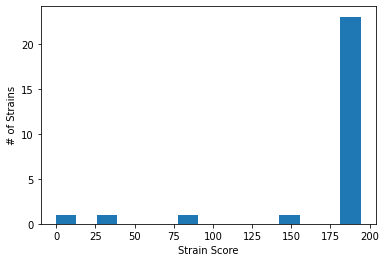

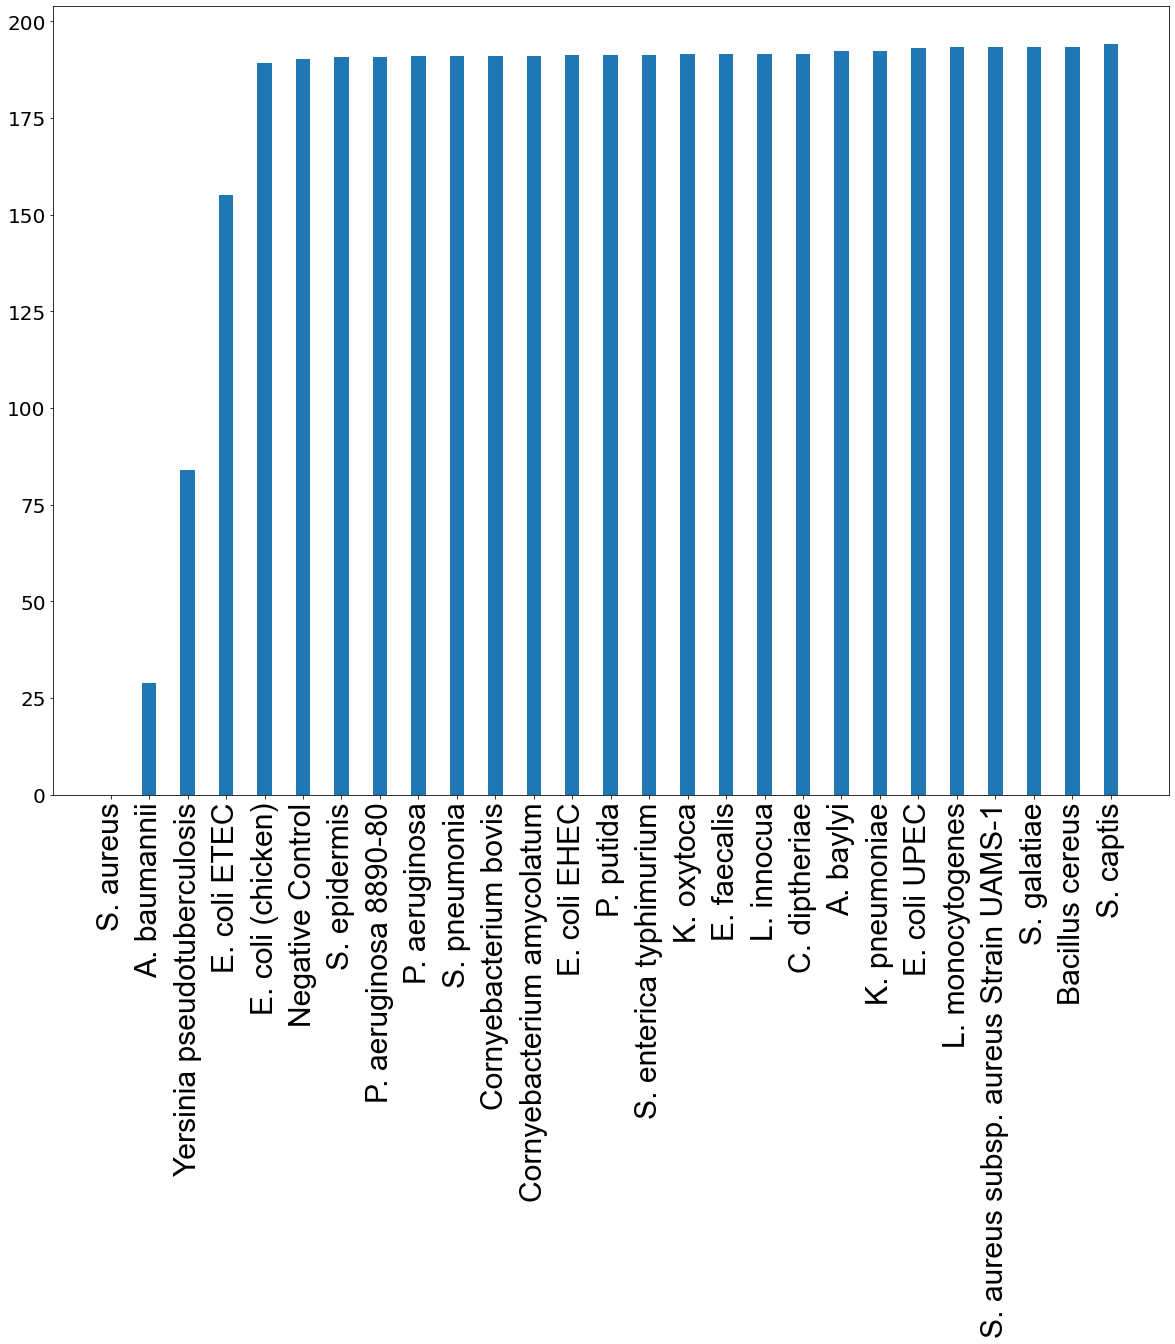

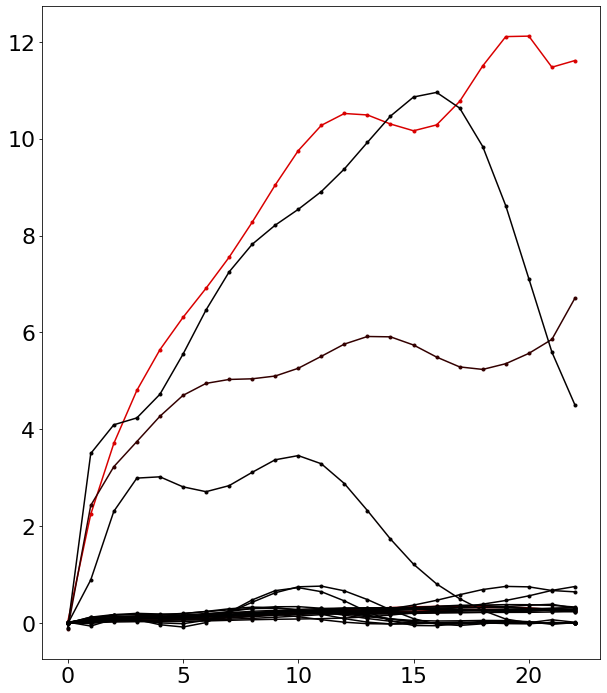

In [46]:
import numpy as np;
import matplotlib.pyplot as plt;
filter_traces = 1;

All_Strain_Nums = list(Num_to_Curve_Dict.keys())
All_Strain_Nums.sort();

Initial_Pathogenic_Strain = Most_Pathogenic_Strain; 
Discriminant_Kernel_Index = 1; # This is assuming we will classify based on the pathogenicity curve of 0 - healthy cell count, 1- unhealthy cell count, or 2- "bacterial patching"
Strain_Scores = [0.0]*(len(All_Strain_Nums));

for Strain_Index in All_Strain_Nums:
    Strain_Scores[Strain_Index-1] = np.sum(Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index]\
              -Num_to_Curve_Dict[Strain_Index][Discriminant_Kernel_Index])

Strain_Scores = np.array(Strain_Scores)
plt.hist(Strain_Scores,bins=15)
plt.xlabel('Strain Score')
plt.ylabel('# of Strains')
Ordered_Strain_Nums = Strain_Scores.argsort();
Ordered_Strain_Names = [Num_to_Name_Dict[order_index] for order_index in Ordered_Strain_Nums]

plt.figure(figsize=(20,14.5))
h_bar = plt.bar(range(0,54,2),Strain_Scores[Ordered_Strain_Nums],tick_label=Ordered_Strain_Names,width=0.75)
plt.xticks(rotation='vertical',fontsize=30)
for tick in plt.gca().get_xticklabels():
    tick.set_fontname("Arial")

plt.yticks(fontsize=20)

plt.figure(figsize=(10,12))

for order_index in Ordered_Strain_Nums:
    plt.plot(savgol_filter(Num_to_Curve_Dict[order_index][Discriminant_Kernel_Index], len(t),9),'.-',color=[ (1.0-Strain_Scores[order_index]/np.max(Strain_Scores) ),0.0,0.0])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.xlabel('Time (Hours)',fontsize=20)
#plt.ylabel('Normalized Feature Count',fontsize=20)

## Identify the Most Pathogenic Strain by Healthy Cell Loss

In [13]:
Num_to_Name_Dict

{18: 'E. coli UPEC',
 19: 'Bacillus cereus',
 20: 'S. galatiae',
 21: 'L. monocytogenes',
 22: 'L. innocua',
 23: 'P. putida',
 12: 'Cornyebacterium amycolatum',
 13: 'S. aureus subsp. aureus Strain UAMS-1',
 14: 'Cornyebacterium bovis',
 9: 'E. coli EHEC',
 10: 'S. enterica typhimurium',
 11: 'C. diptheriae',
 6: 'Yersinia pseudotuberculosis',
 7: 'E. coli ETEC',
 8: 'E. coli (chicken)',
 3: 'S. aureus',
 4: 'A. baumannii',
 5: 'P. aeruginosa',
 0: 'Negative Control',
 1: 'S. epidermis',
 2: 'E. faecalis',
 24: 'P. aeruginosa 8890-80',
 25: 'S. pneumonia',
 26: 'A. baylyi',
 15: 'S. captis',
 16: 'K. oxytoca',
 17: 'K. pneumoniae'}

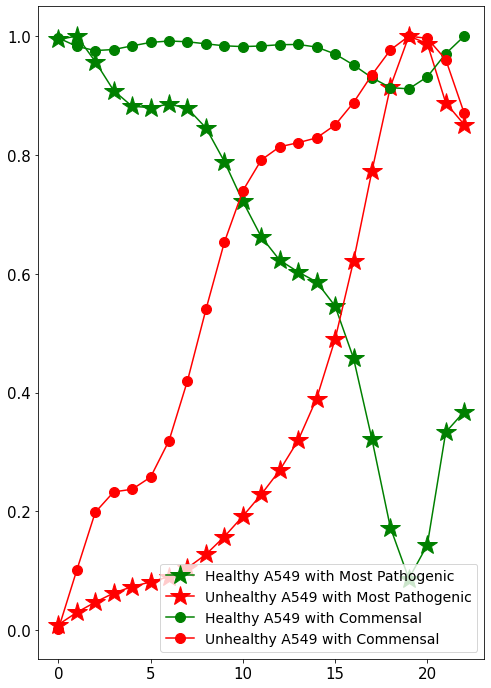

In [52]:
import numpy as np;
import matplotlib.pyplot as plt;
filter_traces = 1;

All_Strain_Nums = list(Num_to_Curve_Dict.keys())
All_Strain_Nums.sort();
Most_Pathogenic_Strain = 0;  # An arbitrary choice to start with, we will optimize over all possible strains. 
Initial_Pathogenic_Strain = Most_Pathogenic_Strain; 
Discriminant_Kernel_Index = 0; # This is assuming we will classify based on the pathogenicity curve of 0 - healthy cell count, 1- unhealthy cell count, or 2- "bacterial patching"
for Strain_Index in All_Strain_Nums:
    MPS = Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index];
    DCS = Num_to_Curve_Dict[Strain_Index][Discriminant_Kernel_Index];
    MPS = MPS/np.max(MPS);
    DCS = DCS/np.max(DCS); 
    if np.sum(MPS-DCS)>0:
        Most_Pathogenic_Strain = Strain_Index; 

t = np.arange(0,len(Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index]*.5),1)



from scipy.signal import savgol_filter

plt.figure(figsize=(8,12))

Initial_Pathogenic_Strain = 1;
if filter_traces:
    This_Y = savgol_filter(Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index], len(t), 9)
    plt.plot(t,This_Y/np.max(This_Y),'g*-',markersize=20)
    This_Y = savgol_filter(Num_to_Curve_Dict[Most_Pathogenic_Strain][1], len(t), 9)
    plt.plot(t,This_Y/np.max(This_Y),'r*-',markersize=20)

    This_Y = savgol_filter(Num_to_Curve_Dict[Initial_Pathogenic_Strain][Discriminant_Kernel_Index], len(t), 9)
    plt.plot(t,This_Y/np.max(This_Y),'g.-',markersize=20)
    This_Y = savgol_filter(Num_to_Curve_Dict[Initial_Pathogenic_Strain][1], len(t), 9)
    plt.plot(t,This_Y/np.max(This_Y),'r.-',markersize=20)
else: 
    This_Y = Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index]
    plt.plot(t,This_Y,'ro-',markersize=10)
    This_Y = Num_to_Curve_Dict[Most_Pathogenic_Strain][0]
    plt.plot(t,This_Y,'go-',markersize=10)

    This_Y = Num_to_Curve_Dict[Initial_Pathogenic_Strain][Discriminant_Kernel_Index]
    plt.plot(t,This_Y,'b.-',markersize=10)
    This_Y = Num_to_Curve_Dict[Initial_Pathogenic_Strain][0]
    plt.plot(t,This_Y,'k.-',markersize=10)

#plt.xlabel('Time',size=20)
#plt.ylabel('Normalized Feature Count',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Healthy A549 with Most Pathogenic' ,  'Unhealthy A549 with Most Pathogenic','Healthy A549 with Commensal','Unhealthy A549 with Commensal'],fontsize=14,loc='lower right')





import numpy as np;
import matplotlib.pyplot as plt;

filter_traces = 1

All_Strain_Nums = list(Num_to_Curve_Dict.keys())
All_Strain_Nums.sort();
Most_Pathogenic_Strain = 1;  # An arbitrary choice to start with, we will optimize over all possible strains. 
Initial_Pathogenic_Strain = Most_Pathogenic_Strain; 
Discriminant_Kernel_Index = 0; # This is assuming we will classify based on the pathogenicity curve of 0 - healthy cell count, 1- unhealthy cell count, or 2- "bacterial patching"
for Strain_Index in All_Strain_Nums:
    if np.sum(Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index]\
              - Num_to_Curve_Dict[Strain_Index][Discriminant_Kernel_Index])>0:
        Most_Pathogenic_Strain = Strain_Index; 

t = np.arange(0,len(Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index]*.5),1)
print(t)
#print(Num_to_Name_Dict[Most_Pathogenic_Strain])

from scipy.signal import savgol_filter

plt.figure(figsize=(8,12))

if filter_traces:
    This_Y = savgol_filter(Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index], len(t), 9)
    plt.plot(t,This_Y,'ro-')
    This_Y = savgol_filter(Num_to_Curve_Dict[Most_Pathogenic_Strain][1], len(t), 9)
    plt.plot(t,This_Y,'bo-')

    This_Y = savgol_filter(Num_to_Curve_Dict[Initial_Pathogenic_Strain][Discriminant_Kernel_Index], len(t), 9)
    plt.plot(t,This_Y,'g.-')
    This_Y = savgol_filter(Num_to_Curve_Dict[Initial_Pathogenic_Strain][1], len(t), 9)
    plt.plot(t,This_Y,'b.-')
else: 
    This_Y = Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index]
    plt.plot(t,This_Y,'ro-')
    This_Y = Num_to_Curve_Dict[Most_Pathogenic_Strain][2]
    plt.plot(t,This_Y,'bo-')

    This_Y = Num_to_Curve_Dict[Initial_Pathogenic_Strain][Discriminant_Kernel_Index]
    plt.plot(t,This_Y,'g.-')
    This_Y = Num_to_Curve_Dict[Initial_Pathogenic_Strain][2]
    plt.plot(t,This_Y,'b.-')

plt.xlabel('Time',size=20)
plt.ylabel('Normalized Feature Count',size=20)
plt.legend(['Most Path., Healthy HCT116' , 'Ref. Commens., Healthy HCT116', 'Most Path., Bact. Text','Ref., Bact. Text.'],fontsize=14,loc='lower right')



## Generate Sorted Relative Pathogenicity Scores w.r.t A. baylyi, using Healthy Cell Loss 

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

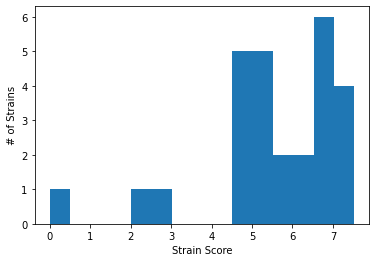

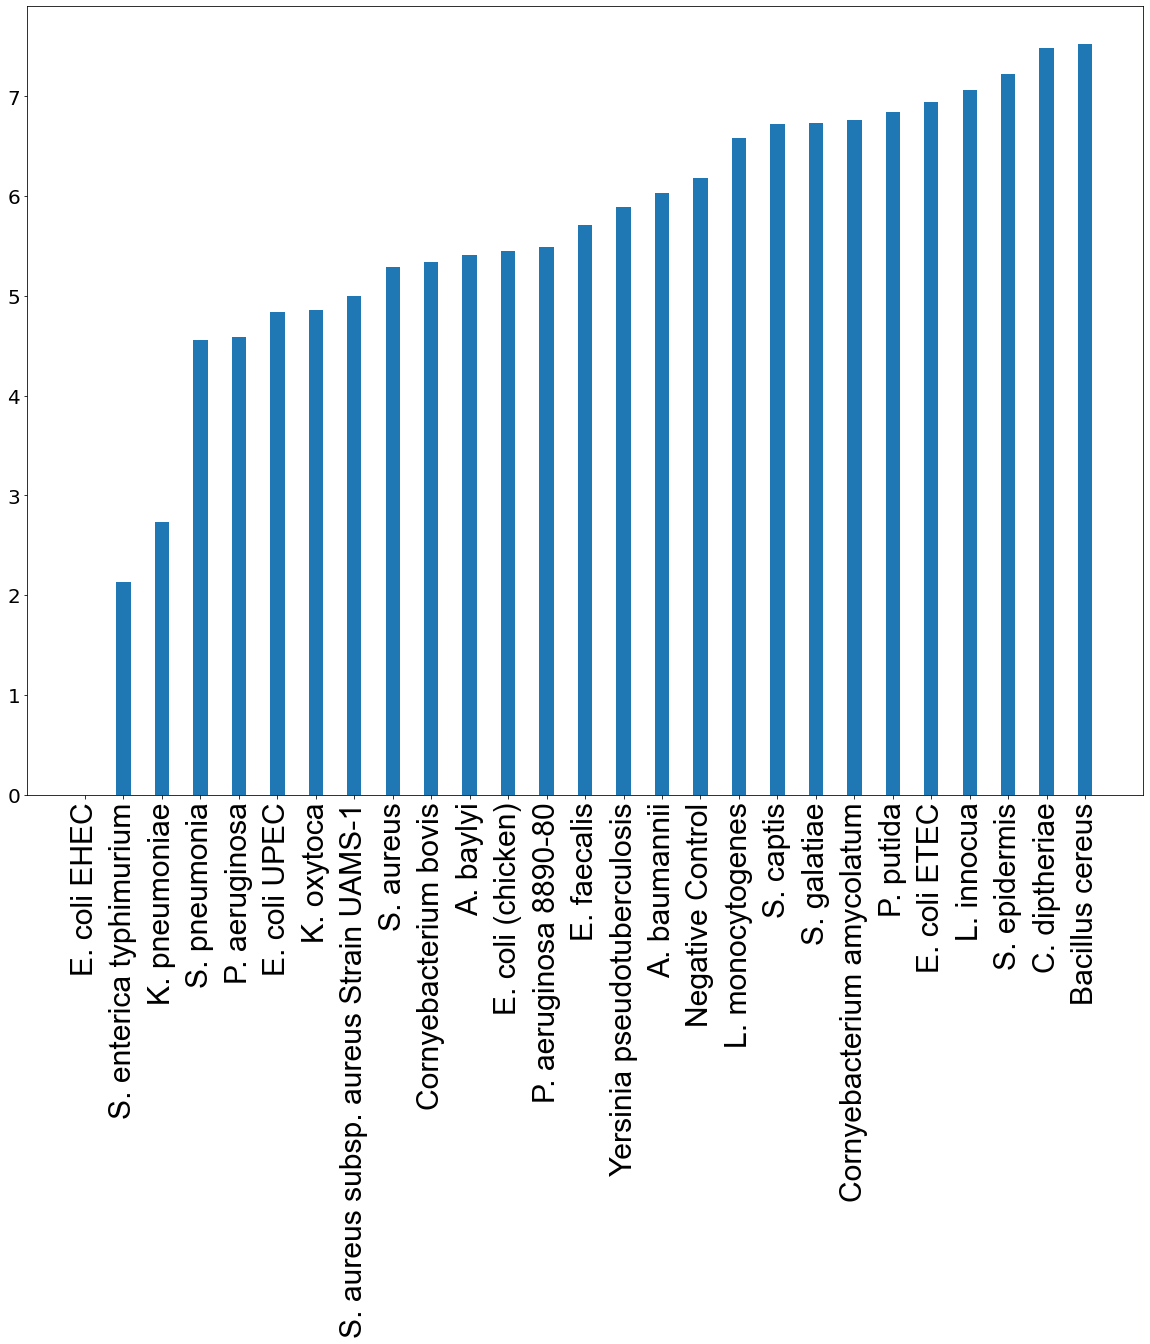

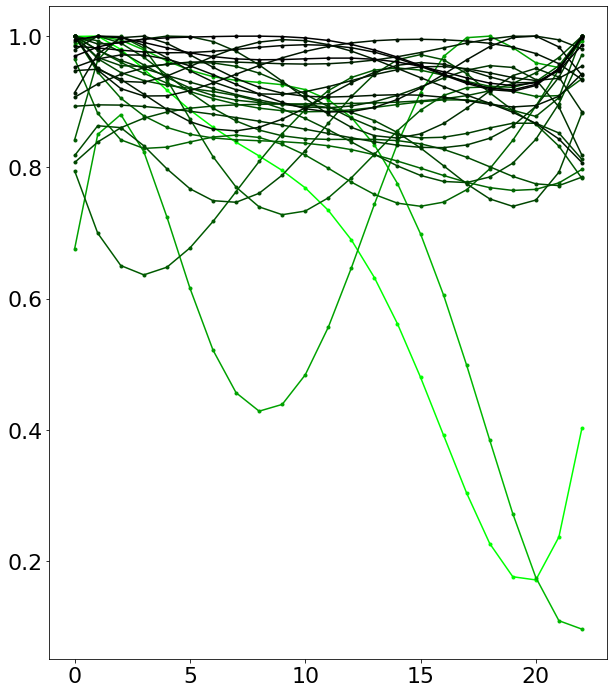

In [56]:
import numpy as np;
import matplotlib.pyplot as plt;
filter_traces = 1;

All_Strain_Nums = list(Num_to_Curve_Dict.keys())
All_Strain_Nums.sort();

Initial_Pathogenic_Strain = Most_Pathogenic_Strain; 
Discriminant_Kernel_Index = 0; # This is assuming we will classify based on the pathogenicity curve of 0 - healthy cell count, 1- unhealthy cell count, or 2- "bacterial patching"
Strain_Scores = [0.0]*(len(All_Strain_Nums));

for Strain_Index in All_Strain_Nums:
    Strain_Scores[Strain_Index] = np.sum(Num_to_Curve_Dict[Strain_Index][Discriminant_Kernel_Index]/np.max(Num_to_Curve_Dict[Strain_Index][Discriminant_Kernel_Index])\
              -Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index]/np.max(Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index]))

    
Strain_Scores = np.array(Strain_Scores)
plt.hist(Strain_Scores,bins=15)
plt.xlabel('Strain Score')
plt.ylabel('# of Strains')
Ordered_Strain_Nums = Strain_Scores.argsort();
Ordered_Strain_Names = [Num_to_Name_Dict[order_index] for order_index in Ordered_Strain_Nums]

plt.figure(figsize=(20,14.5))
h_bar = plt.bar(range(0,54,2),Strain_Scores[Ordered_Strain_Nums],tick_label=Ordered_Strain_Names,width=0.75)
plt.xticks(rotation='vertical',fontsize=30)
for tick in plt.gca().get_xticklabels():
    tick.set_fontname("Arial")

plt.yticks(fontsize=20)

plt.figure(figsize=(10,12))

for order_index in Ordered_Strain_Nums:
    This_Y = savgol_filter(Num_to_Curve_Dict[order_index][Discriminant_Kernel_Index],len(t),5);
    plt.plot(This_Y/np.max(This_Y) ,'.-',color=[0.0,(1.0-Strain_Scores[order_index]/np.max(Strain_Scores) ),0.0])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


## Clustering Analysis on Dynamic Feature Pathogen-Response Curves based on Pathogen Cytotoxicity

/Users/enochyeung/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


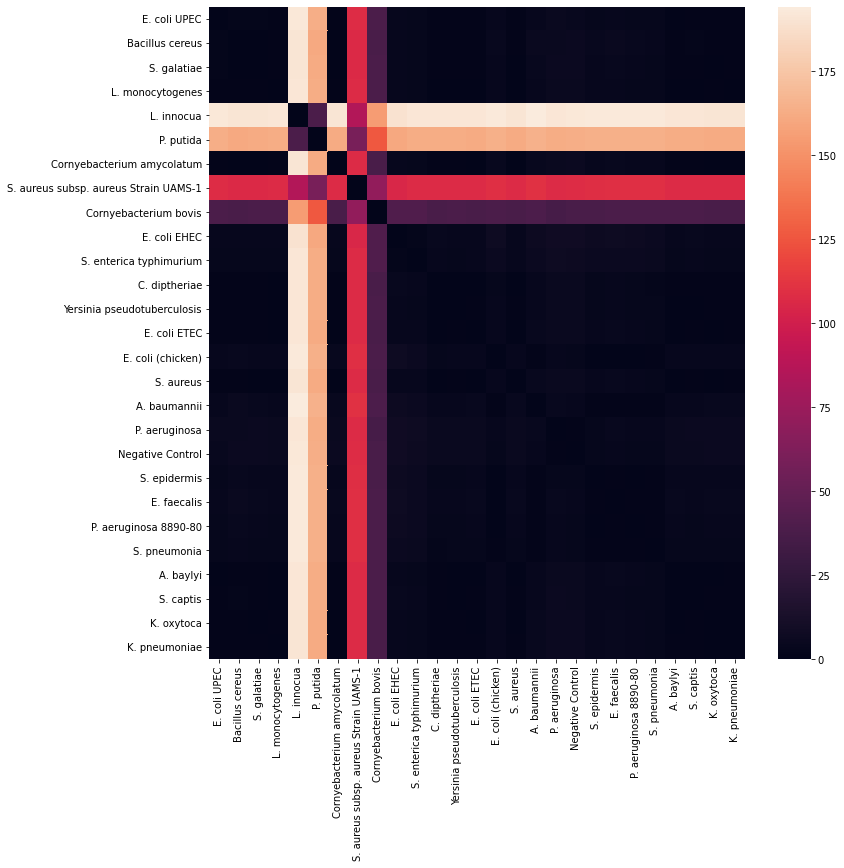

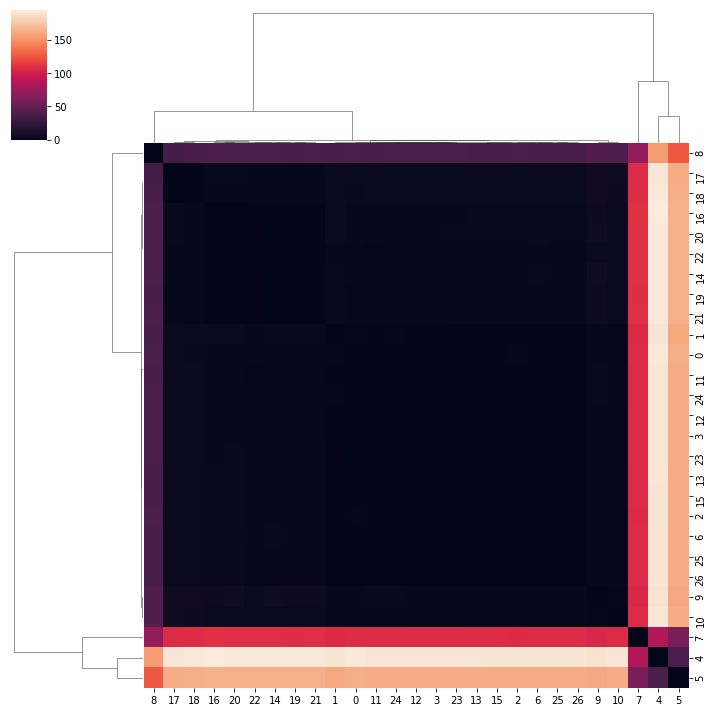

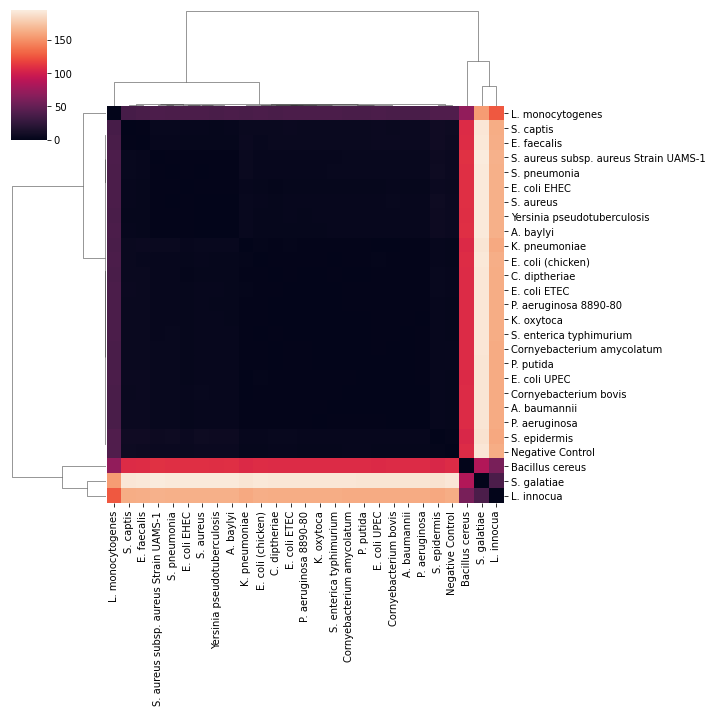

In [57]:
All_Strain_Nums = list(Num_to_Curve_Dict.keys())
All_Strain_Nums.sort();


Discriminant_Kernel_Index = 1; # This is assuming we will classify based on the pathogenicity curve of 0 - healthy cell count, 1- unhealthy cell count, or 2- "bacterial patching"
Strain_Scores = [0.0]*(len(All_Strain_Nums));
Adjacency_Matrix = np.zeros((len(All_Strain_Nums),len(All_Strain_Nums)));

for Strain_Index_I in All_Strain_Nums:
    for Strain_Index_J in All_Strain_Nums:
        Adjacency_Matrix[Strain_Index_I][Strain_Index_J] = np.linalg.norm(Num_to_Curve_Dict[Strain_Index_I][Discriminant_Kernel_Index] - Num_to_Curve_Dict[Strain_Index_J][Discriminant_Kernel_Index],ord=1)
#    Strain_Scores[Strain_Index-1] = np.sum(Num_to_Curve_Dict[Strain_Index][Discriminant_Kernel_Index]\
#              -Num_to_Curve_Dict[Most_Pathogenic_Strain][Discriminant_Kernel_Index])
import seaborn as sns 
plt.figure(figsize=(12,12))
sns.heatmap(Adjacency_Matrix,xticklabels=Num_to_Name_Dict.values(),yticklabels=Num_to_Name_Dict.values())
argout = sns.clustermap(Adjacency_Matrix)
reordered_indices = argout.dendrogram_row.reordered_ind; 
reordered_names_list = [Num_to_Name_Dict[this_index] for this_index in reordered_indices];
sns.clustermap(Adjacency_Matrix,xticklabels=reordered_names_list,yticklabels=reordered_names_list)

In [91]:
argout.dendrogram_col.plot()

TypeError: plot() missing 2 required positional arguments: 'ax' and 'tree_kws'